In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('titanic_dataset.csv')

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df=pd.DataFrame(data)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There are  in total 891 records and 12 columns. The output(target)variable is whether the passenger will survive or not i.e survived feature.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The feature named as Name,Sex,Ticket,Cabin and Embarked are having object as a datatype. Further,there are some Nan values in Age,Cabin and Embarked.

In [11]:
df.shape

(891, 12)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are presence of total 177 Nan values in Age feature and 687 total Nan values in Cabin feature.

<AxesSubplot:>

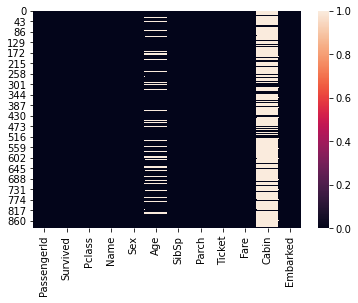

In [15]:
sns.heatmap(df.isnull())

From the heatmap it can be confirmed there are nan values in Age and Cabin feature.

In [16]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

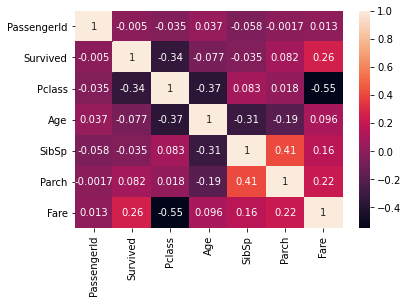

In [17]:
sns.heatmap(df.corr(),annot=True)

From the heatmap it can be said there is a poor correlation of the survived feature with Age, SibSp,Parch. There is a negative correlation of Pclass with survived feature.

<AxesSubplot:xlabel='Age', ylabel='Density'>

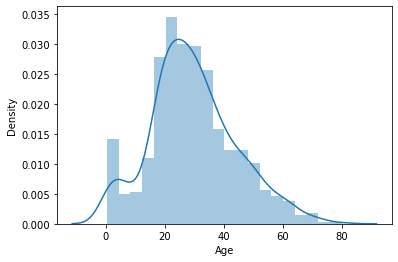

In [36]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

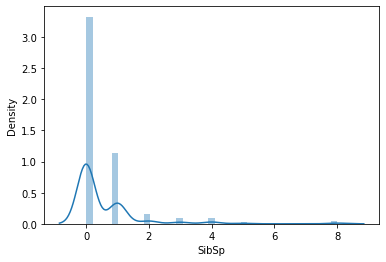

In [37]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

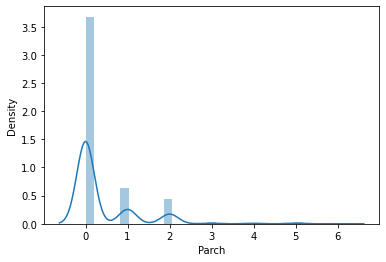

In [38]:
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

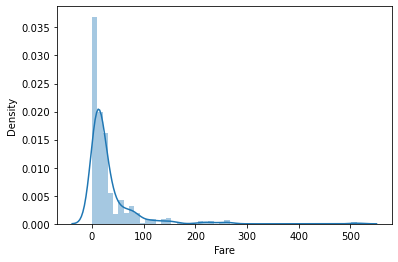

In [39]:
sns.distplot(df['Fare'])

From the above distplot it can be said there is skewness present in Age,Sibsp,Parch,Fare.

<AxesSubplot:xlabel='Age'>

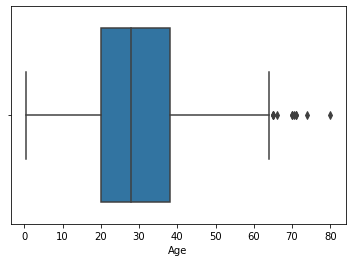

In [40]:
sns.boxplot(df['Age'].dropna())

<AxesSubplot:xlabel='SibSp'>

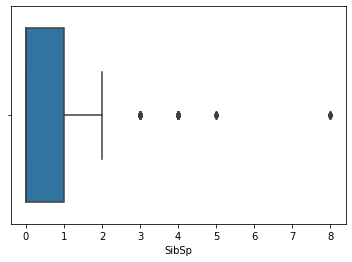

In [42]:
sns.boxplot(df['SibSp'].dropna())

<AxesSubplot:xlabel='Parch'>

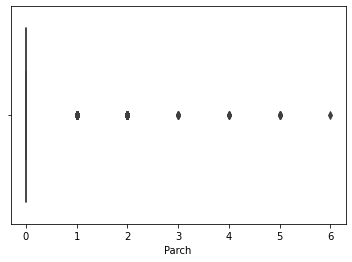

In [116]:
sns.boxplot(df['Parch'].dropna())

<AxesSubplot:xlabel='Fare'>

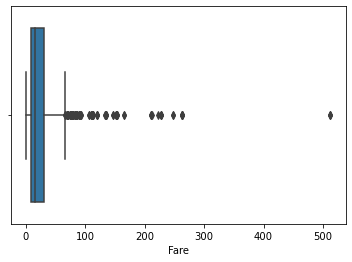

In [47]:
sns.boxplot(df['Fare'].dropna())

In [48]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There are in total 891 passengers out of which 549 didn't survived and 342 survived. Further, it can be said there is no imbalance in the output(target) feature.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

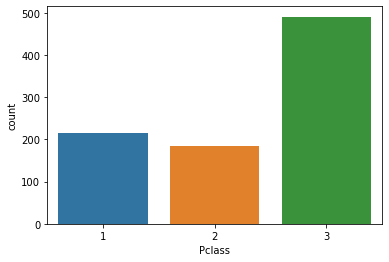

In [51]:
sns.countplot(df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

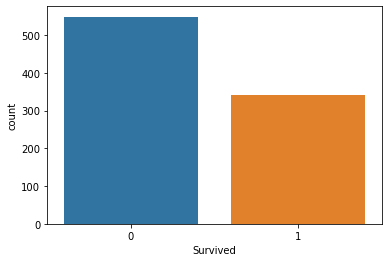

In [52]:
sns.countplot(df['Survived'])

In [56]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
C90            1
A7             1
B4             1
B41            1
C91            1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

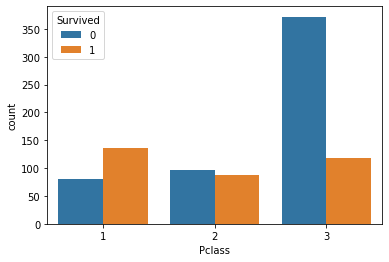

In [62]:
sns.countplot(df['Pclass'],hue=df['Survived'])

From the above countplot it can be said the people travelling in third class are at higher risk of not surviving.
Further, the people travelling in first class survival rate is higher as compated to other class of passengers

<AxesSubplot:xlabel='Sex', ylabel='count'>

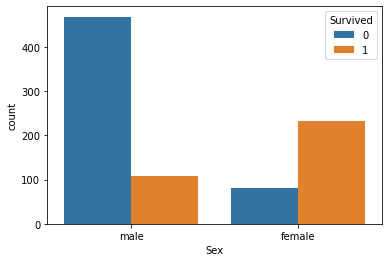

In [63]:
sns.countplot(df['Sex'],hue=df['Survived'])

The female survival rate is higher than that of male.

In [64]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are in total 577 male passengers and 314 female passengers travelling.

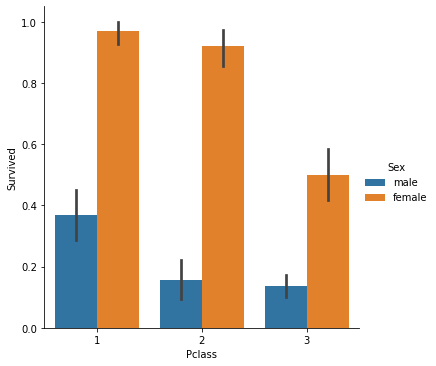

In [73]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='bar',data=df)

From the above catplot female survival rate is higher in all classes as compared to male.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

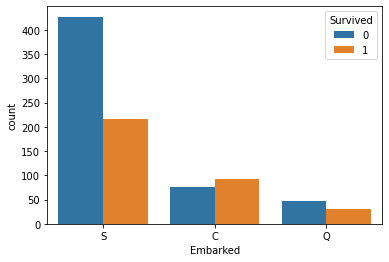

In [80]:
sns.countplot(df['Embarked'],hue='Survived',data=df)

In [81]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are 644 passengers embarked from Southampton, 168 passengers embarked from Cherbourg and 77 passengers embarked from QueensTown.

In [90]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

There are in total 608 passengers travelling without siblings/spouse i.e they are travelling alone.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

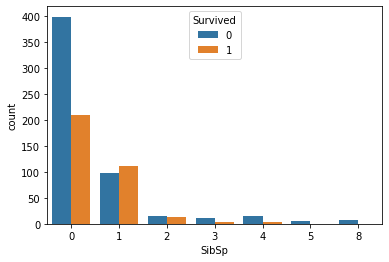

In [91]:
sns.countplot(df['SibSp'],hue="Survived",data=df)

The passenger travelling with 1 sibling/spouse has a higher rate of survival as compared with non survival rate for the same category.

In [92]:
pd.crosstab(df['Survived'],df['SibSp'],margins=True)

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


The survival rate for passengers travelling alone is 35% as compared to 53% for the passengers travelling with 1 sibling/spouse.

<AxesSubplot:xlabel='Parch', ylabel='count'>

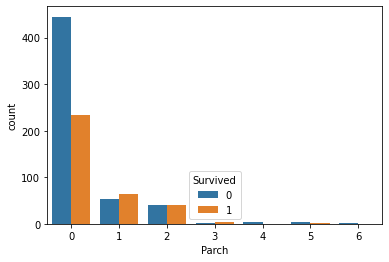

In [93]:
sns.countplot(df['Parch'],hue="Survived",data=df)

In [94]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

There are in total 678 passengers travelling without parents/children spouse i.e they are travelling alone.

In [95]:
pd.crosstab(df['Survived'],df['Parch'],margins=True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


The survival rate for passengers travelling alone is 34% as compared to 53% for the passengers travelling with parents/children.

In [96]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

Will be replacing Nan values in age column by mean of the entire colum as the data is normally distributed.

In [99]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
pd.crosstab(df['Survived'],df['Cabin'],margins=True)

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,1,...,0,1,2,1,0,1,0,2,1,68
1,0,0,1,0,1,1,0,1,1,0,...,1,0,0,2,3,0,2,2,0,136
All,1,1,1,1,1,1,1,1,1,1,...,1,1,2,3,3,1,2,4,1,204


There is as such no correlation between survival rate cand cabin the passenger is travelling and we cannot replace Nan values in cabin by most frequent repeated values that is mode so it is better to elimnate the cabin column.

In [107]:
df.drop('Cabin',axis=1,inplace=True)

In [108]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [110]:
df['Ticket'].value_counts()

CA. 2343      7
1601          7
347082        7
3101295       6
347088        6
             ..
3101277       1
349218        1
C.A. 18723    1
PC 17759      1
349247        1
Name: Ticket, Length: 681, dtype: int64

In [112]:
pd.crosstab(df['Survived'],df['Ticket'],margins=True)

Ticket,110152,110413,110465,110564,110813,111240,111320,111361,111369,111426,...,SW/PP 751,W./C. 14258,W./C. 14263,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,1,2,0,0,1,1,0,0,0,...,0,0,1,2,4,1,1,1,1,549
1,3,2,0,1,1,0,0,2,1,1,...,1,1,0,0,0,0,0,0,1,342
All,3,3,2,1,1,1,1,2,1,1,...,1,1,1,2,4,1,1,1,2,891


The ticket feature will be removed as such it will not make any sense keeping it in the dataset.

In [113]:
df.drop('Ticket',axis=1,inplace=True)

In [114]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


Checking out for oultiers in age column and fare column. Further, as the SibSp and Parch is having outliers as per box plot there is no point in removing as a passenger can be accompanied with 5 people 6 people and so .

In [117]:
df2=df.copy()

In [119]:
Q1=df2['Age'].quantile(0.25)
Q3=df2['Age'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
df2=df2[(df2['Age']>lower_boundary)& (df2['Age']<upper_boundary)]

In [120]:
df2.shape

(825, 10)

In [121]:
Q1=df2['Fare'].quantile(0.25)
Q3=df2['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
df2=df2[(df2['Fare']>lower_boundary) & (df2['Fare']<upper_boundary)]

In [122]:
df2.shape

(718, 10)

So by using IQR method for outlier removal we are losing approx 20% of data in such a small datset which is not justifiable.

In [123]:
pd.crosstab(df['Survived'],df['Age'],margins=True)

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,...,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,All
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,0,2,3,1,2,1,2,1,0,549
1,1,1,2,2,1,5,3,5,7,4,...,2,0,0,0,0,0,0,0,1,342
All,1,1,2,2,1,7,10,6,10,4,...,2,2,3,1,2,1,2,1,1,891


There is no point in removing outliers from age as there might be passengers travelling with age above 70 also.

In [126]:
df3=df.copy()

In [130]:
Q1=df3['Fare'].quantile(0.25)
Q3=df3['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
df3=df3[(df3['Fare']>lower_boundary) & (df3['Fare']<upper_boundary)]

In [131]:
df3.shape

(775, 10)

I am still getting a data loss of 13% using IQR which is not justifiable so the best thing is to replace the outliers value by the median of the respective columns as the data is having right tailed skewness not normally distributed.

In [141]:
df4=df.copy()

In [144]:
Q1=df3['Fare'].quantile(0.25)
Q3=df3['Fare'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR
df4['Fare'].values[df4['Fare']>upper_boundary]=np.nan

In [145]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         750 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [146]:
df4['Fare']=df4['Fare'].fillna(df4['Fare'].median())

In [147]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [157]:
df4['Embarked']=df4['Embarked'].replace(np.nan,'S')

In [158]:
df4['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [159]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Have replaced the Nan values in embarked feature by mode i.e the most repeated values which is S 

In [160]:
df4.drop('Name',axis=1,inplace=True)

In [162]:
df4.drop('PassengerId',axis=1,inplace=True)

In [163]:
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.25000,S
1,1,1,female,38.000000,1,0,12.28125,C
2,1,3,female,26.000000,0,0,7.92500,S
3,1,1,female,35.000000,1,0,53.10000,S
4,0,3,male,35.000000,0,0,8.05000,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.00000,S
887,1,1,female,19.000000,0,0,30.00000,S
888,0,3,female,29.699118,1,2,23.45000,S
889,1,1,male,26.000000,0,0,30.00000,C


In [165]:
le=LabelEncoder()
df4['Sex']=le.fit_transform(df4['Sex'])
df4['Embarked']=le.fit_transform(df4['Embarked'])

In [166]:
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.25000,2
1,1,1,0,38.000000,1,0,12.28125,0
2,1,3,0,26.000000,0,0,7.92500,2
3,1,1,0,35.000000,1,0,53.10000,2
4,0,3,1,35.000000,0,0,8.05000,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.00000,2
887,1,1,0,19.000000,0,0,30.00000,2
888,0,3,0,29.699118,1,2,23.45000,2
889,1,1,1,26.000000,0,0,30.00000,0


In [167]:
df4.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.546662
Embarked   -1.264823
dtype: float64

 treating skewness in the continuous dataset i.e fare

In [178]:
from sklearn.preprocessing import power_transform

In [179]:
df4['Fare']=power_transform(df4['Fare'].values.reshape(-1,1))

In [180]:
df4.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        0.067449
Embarked   -1.264823
dtype: float64

Skewness has been treated.

In [173]:
from sklearn.preprocessing import power_transform

In [176]:
df6['Fare']=power_transform(df6['Fare'].values.reshape(-1,1))

In [177]:
df6.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        0.067449
Embarked   -1.264823
dtype: float64

Splitting the data in testing and training for model building.

In [181]:
x=df4.drop('Survived',axis=1)
y=df4['Survived']

In [182]:
se=StandardScaler()
x=se.fit_transform(x)

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [188]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[90 15]
 [19 55]]
0.7638888888888888


In [189]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.7932960893854749
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

[[85 20]
 [17 57]]
0.7549668874172186


In [190]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

[[93 12]
 [21 53]]
0.762589928057554


In [191]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))


0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

[[90 15]
 [18 56]]
0.7724137931034482


In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[91 14]
 [18 56]]
0.7777777777777778


In [197]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.8156424581005587
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[89 16]
 [17 57]]
0.7755102040816327


In [199]:
gr=GradientBoostingClassifier()
gr.fit(x_train,y_train)
pred=gr.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 12]
 [23 51]]
0.7445255474452555


Checking out the cross_val_score

In [202]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.7878789780930262


In [203]:
score=cross_val_score(dtc,x,y,cv=5)
print(score.mean())

0.7834097043500095


In [204]:
score=cross_val_score(svc,x,y,cv=5)
print(score.mean())

0.8204193082669011


In [205]:
score=cross_val_score(knn,x,y,cv=5)
print(score.mean())

0.8047266336074321


In [206]:
score=cross_val_score(rfc,x,y,cv=5)
print(score.mean())

0.8125855250768941


In [207]:
score=cross_val_score(ada,x,y,cv=5)
print(score.mean())

0.8125918021467579


In [208]:
score=cross_val_score(gr,x,y,cv=5)
print(score.mean())

0.8249576297784194


# SVC is my best model as the diference between accuracy_score and cross_val_score is minimium.

Hypertuning of parameters will be carried out to check whether the accuracy can be improved or not

In [216]:
from sklearn.model_selection import RandomizedSearchCV

In [218]:
rsc=RandomizedSearchCV(svc,param_distributions=params,cv=5)
rsc.fit(x_train,y_train)
rsc.best_params_

{'kernel': 'rbf', 'degree': 1, 'C': 1}

In [219]:
svc=SVC(C=1,kernel='rbf',degree=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(f1_score(y_test,pred))

0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

[[93 12]
 [21 53]]
0.762589928057554


# The accuracy score of my SVC model is 82%

In [221]:
from sklearn.metrics import plot_roc_curve

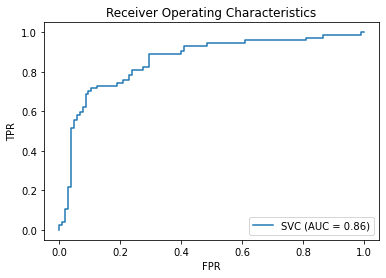

In [222]:
plot_roc_curve(svc,x_test,y_test)
plt.title('Receiver Operating Characteristics')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [223]:
import joblib

In [225]:
joblib.dump('svc','titanic_dataset.obj')

['titanic_dataset.obj']

In [226]:
joblib.load('titanic_dataset.obj')

'svc'